# Project: Investigate No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Questions
1. Can we use age to predict if a patient will show up for their scheduled appointment?
2. How Bolsa Familia relate to Show or Not Show on scheduled appointments?
3. How does gender relate to Show or No Show?
4. How do diseases suffered relate to gender?
5. How do diseases age relate to diseases suffered?
6. How total number of diseases suffered by each patient relate to Show or Not Show?
7. How location relate to Show or Not Show?
8. How do waiting period relate to Show or Not Show?


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv("C:\\Users\\Reinaldy\\Desktop\\ITB\\IF\\Python\\Udacity\\project2\\noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

#### Check for Null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no null values discovered

#### Check for duplicated rows

In [5]:
df.duplicated().sum()

0

no duplicated rows

#### Discover insights from a quick descriptive statistics of the dataset using describe function.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- The Age contains some anomaly values
- The Handicap column has max. value of 4, which needs more exploration

#### Rename column names to include underscores and convert to lowercase letters 

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
df.rename(columns= lambda x: x.lower(),inplace=True)

In [9]:
df.rename(columns= {"patientid":"patient_id","appointmentid":"appointment_id","scheduledday":"scheduled_day","appointmentday":"appointment_day","no-show":"no_show",'handcap':'handicap'},inplace=True)

#### Check changes changes on column names

In [10]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

### Data Cleaning (Age Column, Handicap Column)

#### Check age column

In [11]:
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### Get the rows with anomaly age data

In [12]:
df.loc[df.age<0,:]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### Drop the rows with anomaly age data

In [13]:
df.drop(df[df.age<0].index,inplace=True)

#### Check changes

In [14]:
df.loc[df.age<0,:]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show


In [15]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### Create new column, "age_levels" with age groups/categories

#### The age_levels column classifies patient to the following age categories:
- Teenager    : 0-18 y.o.
- Young adults: 18-37 y.o.
- Middle      : 37-55 y.o.
- Senior      : 55-115 y.o.

In [16]:
bin_edges = [0,18,37,55,115]

In [17]:
bin_names = ["teenager","young adults","middle","senior"]

In [18]:
df["age_levels"]=pd.cut(df["age"],bin_edges,labels=bin_names,include_lowest=True)

#### Check handicap column

In [19]:
df.handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

#### The handicap column consists of 5 levels, namely 0,1,2,3,4
#### Get number of rows with handicap level of more than 1

In [20]:
df.query("handicap>1").shape[0]

199

#### Cast the handicap level of rows with handicap level of more than 1 to level 1

In [21]:
df.loc[df.handicap>1,"handicap"]= np.repeat(1,199)

#### again, check the changes

In [22]:
df.handicap.value_counts()

0    108285
1      2241
Name: handicap, dtype: int64

#### Create a new column, "total" which was the total number of diseases suffered

In [23]:
df.loc[:,"total"] = df.loc[:,"hipertension":"handicap"].sum(axis=1)

#### Get the date from appointment_day and scheduled_day columns

In [24]:
df["appointment_day"]=df.appointment_day.str[:10]
df["scheduled_day"]=df.scheduled_day.str[:10]

#### Create a new column, "await" which was the waiting period

In [25]:
df["await"]=pd.to_datetime(df["appointment_day"])-pd.to_datetime(df["scheduled_day"])

#### Check await column

In [26]:
df["await"]=df["await"].apply(lambda x: x.days)

In [27]:
df.await.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: await, dtype: float64

In [28]:
df.loc[df["await"]<0,:]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_levels,total,await
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,middle,1,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,young adults,1,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,young adults,0,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,senior,0,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,teenager,0,-1


In [29]:
df.drop(df[df.await<0].index,inplace=True)

In [30]:
df.loc[df["await"]<0,:]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_levels,total,await


In [31]:
df.drop(["patient_id","appointment_id"],axis=1,inplace=True)

#### Create a new column, await levels that categorizes waiting period

In [32]:
df=df.assign(await_levels=pd.Series(np.ceil(df.loc[:,"await"]/7).astype("int")))

### Clean dataset

<a id='eda'></a>
## Exploratory Data Analysis

In [33]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_levels,total,await,await_levels
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,senior,1,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,senior,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,senior,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,teenager,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,senior,2,0,0


### Divide df into Show and No Show Groups

In [34]:
show=df[df.no_show=="No"]
noshow=df[df.no_show=="Yes"]

#### Drop no_show columns since it is no longer needed

In [35]:
show = show.drop("no_show",axis=1)
noshow = noshow.drop("no_show",axis=1)

In [36]:
show.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,age_levels,total,await,await_levels
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,senior,1,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,senior,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,senior,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,teenager,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,senior,2,0,0


In [37]:
noshow.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,age_levels,total,await,await_levels
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,young adults,0,2,1
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,middle,0,2,1
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,young adults,0,3,1
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,middle,0,1,1
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,young adults,0,2,1


In [38]:
show.shape

(88207, 15)

In [39]:
noshow.shape

(22314, 15)

In [40]:
total=df.shape[0]
total

110521

### Question 1: Can we use age to predict if a patient will show up for their scheduled appointment?

To answer Question 1, we plot the distribution of ages in the two groups in terms of proportions. A bar plot is used, since the difference would be too subtle if a pie chart was chosen instead 

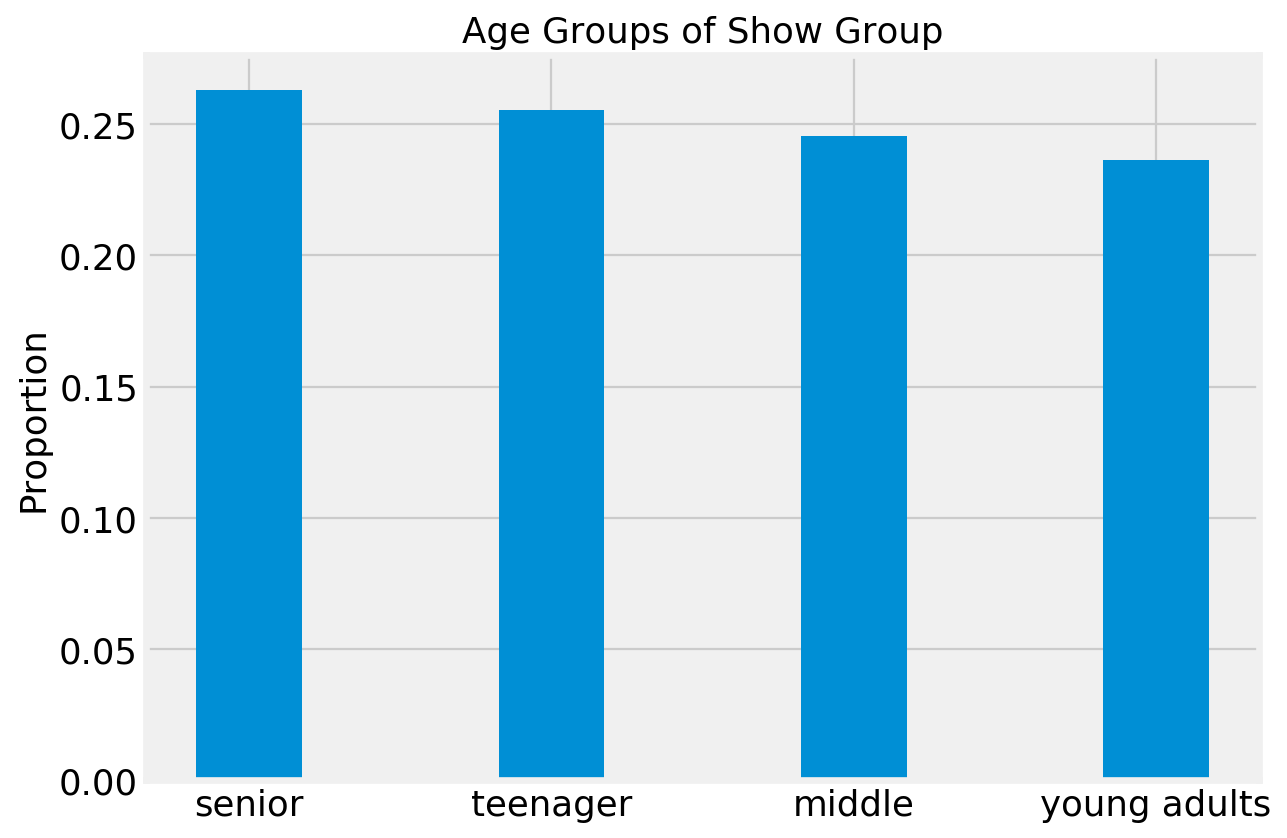

In [41]:
fig = plt.figure(figsize=(8,6),dpi=80)
ax = fig.add_subplot(1, 1, 1)
total_show = show.age_levels.value_counts().sum()
show_age_prop= show.age_levels.value_counts()/total_show
plt.bar(show_age_prop.index,show_age_prop.values,width=0.35);
plt.ylabel("Proportion",fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Age Groups of Show Group",fontsize=16);

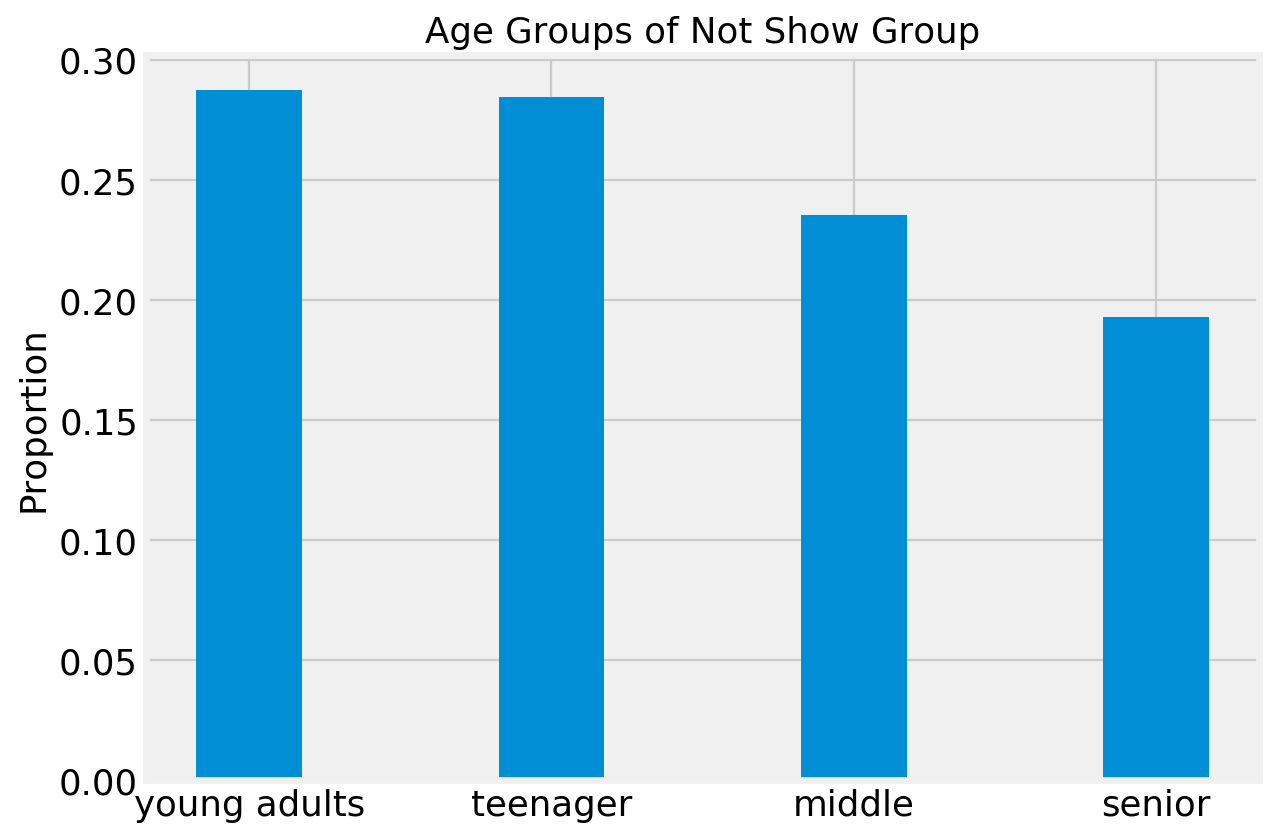

In [42]:
fig = plt.figure(figsize=(8,6),dpi=80)
ax = fig.add_subplot(1, 1, 1)
total_noshow = noshow.age_levels.value_counts().sum()
noshow_age_prop = noshow.age_levels.value_counts()/total_noshow
plt.bar(noshow_age_prop.index,noshow_age_prop.values,width=0.35);
plt.ylabel("Proportion",fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Age Groups of Not Show Group",fontsize=16);

From the two bar plots above, we learn that young adults with ages from 18-37 y.o. make up the most proportion of the Not Showing Group, meanwhile Seniors were the most likely to show up on their scheduled appointment. Therefore, given the relation, we can use age to predict show or not show.

### Question 2: How Bolsa Familia relate to Show or Not Show on scheduled appointments?

In [43]:
total_scholarship=show.scholarship.value_counts()[1]+noshow.scholarship.value_counts()[1]
show.scholarship.value_counts()[1]/total_scholarship

0.7626369579228433

In [44]:
noshow.scholarship.value_counts()[1]/total_scholarship

0.2373630420771568

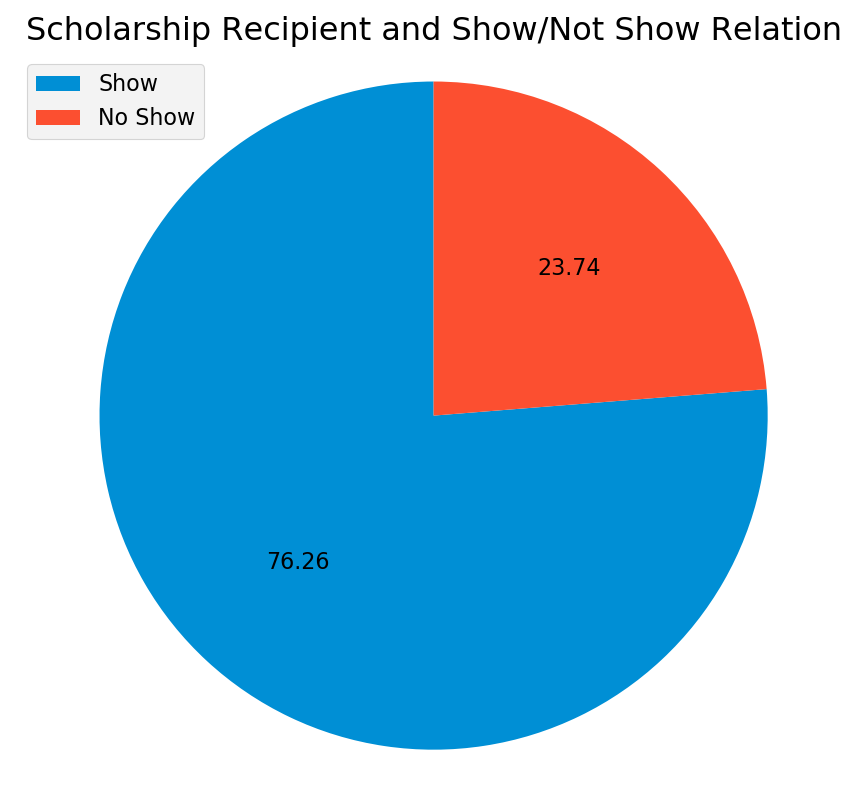

In [45]:
fig = plt.figure(figsize=(6,6),dpi=80)
ax = fig.add_subplot(1, 1, 1)
plt.axis("equal")
labels=["Show","No Show"]
plt.pie([show.scholarship.value_counts()[1]/total_scholarship,noshow.scholarship.value_counts()[1]/total_scholarship],startangle=90,autopct='%.2f')
plt.legend(labels, loc="best")
plt.title("Scholarship Recipient and Show/Not Show Relation");

From the pie chart above, we learn that scholarship recipients are more likely to show on scheduled appointments. Therefore, Bolsa Familia Program scholarship can be used to predict show/no show on appointments.

### Question 3: How does gender relate to Show or No Show?

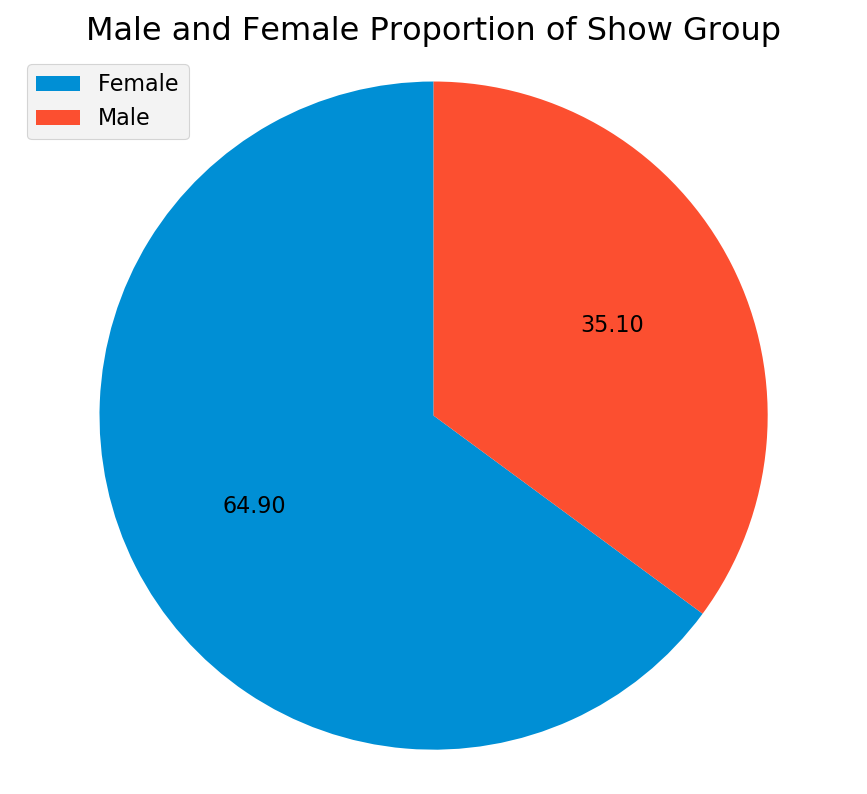

In [46]:
fig = plt.figure(figsize=(6,6),dpi=80)
ax = fig.add_subplot(1, 1, 1)
plt.axis("equal")
show_gender = show.gender.value_counts()
labels=["Female","Male"]
plt.pie(show_gender,startangle=90,autopct='%.2f')
plt.legend(labels, loc="best")
plt.title("Male and Female Proportion of Show Group");

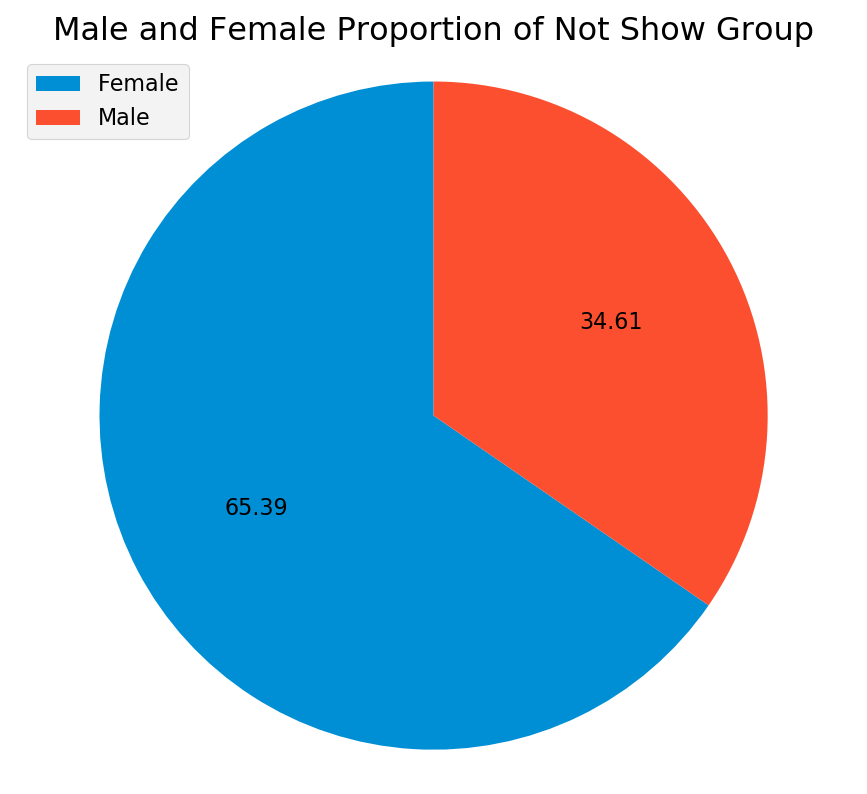

In [47]:
fig = plt.figure(figsize=(6,6),dpi=80)
ax = fig.add_subplot(1, 1, 1)
plt.axis("equal")
noshow_gender = noshow.gender.value_counts()
labels=["Female","Male"]
plt.pie(noshow_gender,startangle=90,autopct='%.2f')
plt.legend(labels, loc="best")
plt.title("Male and Female Proportion of Not Show Group");

From the pie charts above, we learn that women make up the larger proportion compared to men in making medical appointments. However, no conclusion can be drawn from the pie charts whether women are more likely to not show in a scheduled appointment.

### Question 4: How do diseases suffered relate to gender?

In [48]:
ind=np.arange(4)
width=0.35

In [49]:
show_groupby_gender = show.groupby("gender").sum().loc[:,"hipertension":"handicap"]
show_groupby_gender

,hipertension,diabetes,alcoholism,handicap
gender,,,,
F,12682,4589,915,1047
M,5347,1924,1768,787


In [50]:
noshow_groupby_gender = noshow.groupby("gender").sum().loc[:,"hipertension":"handicap"]
noshow_groupby_gender

,hipertension,diabetes,alcoholism,handicap
gender,,,,
F,2657,1017,308,242
M,1115,413,369,163


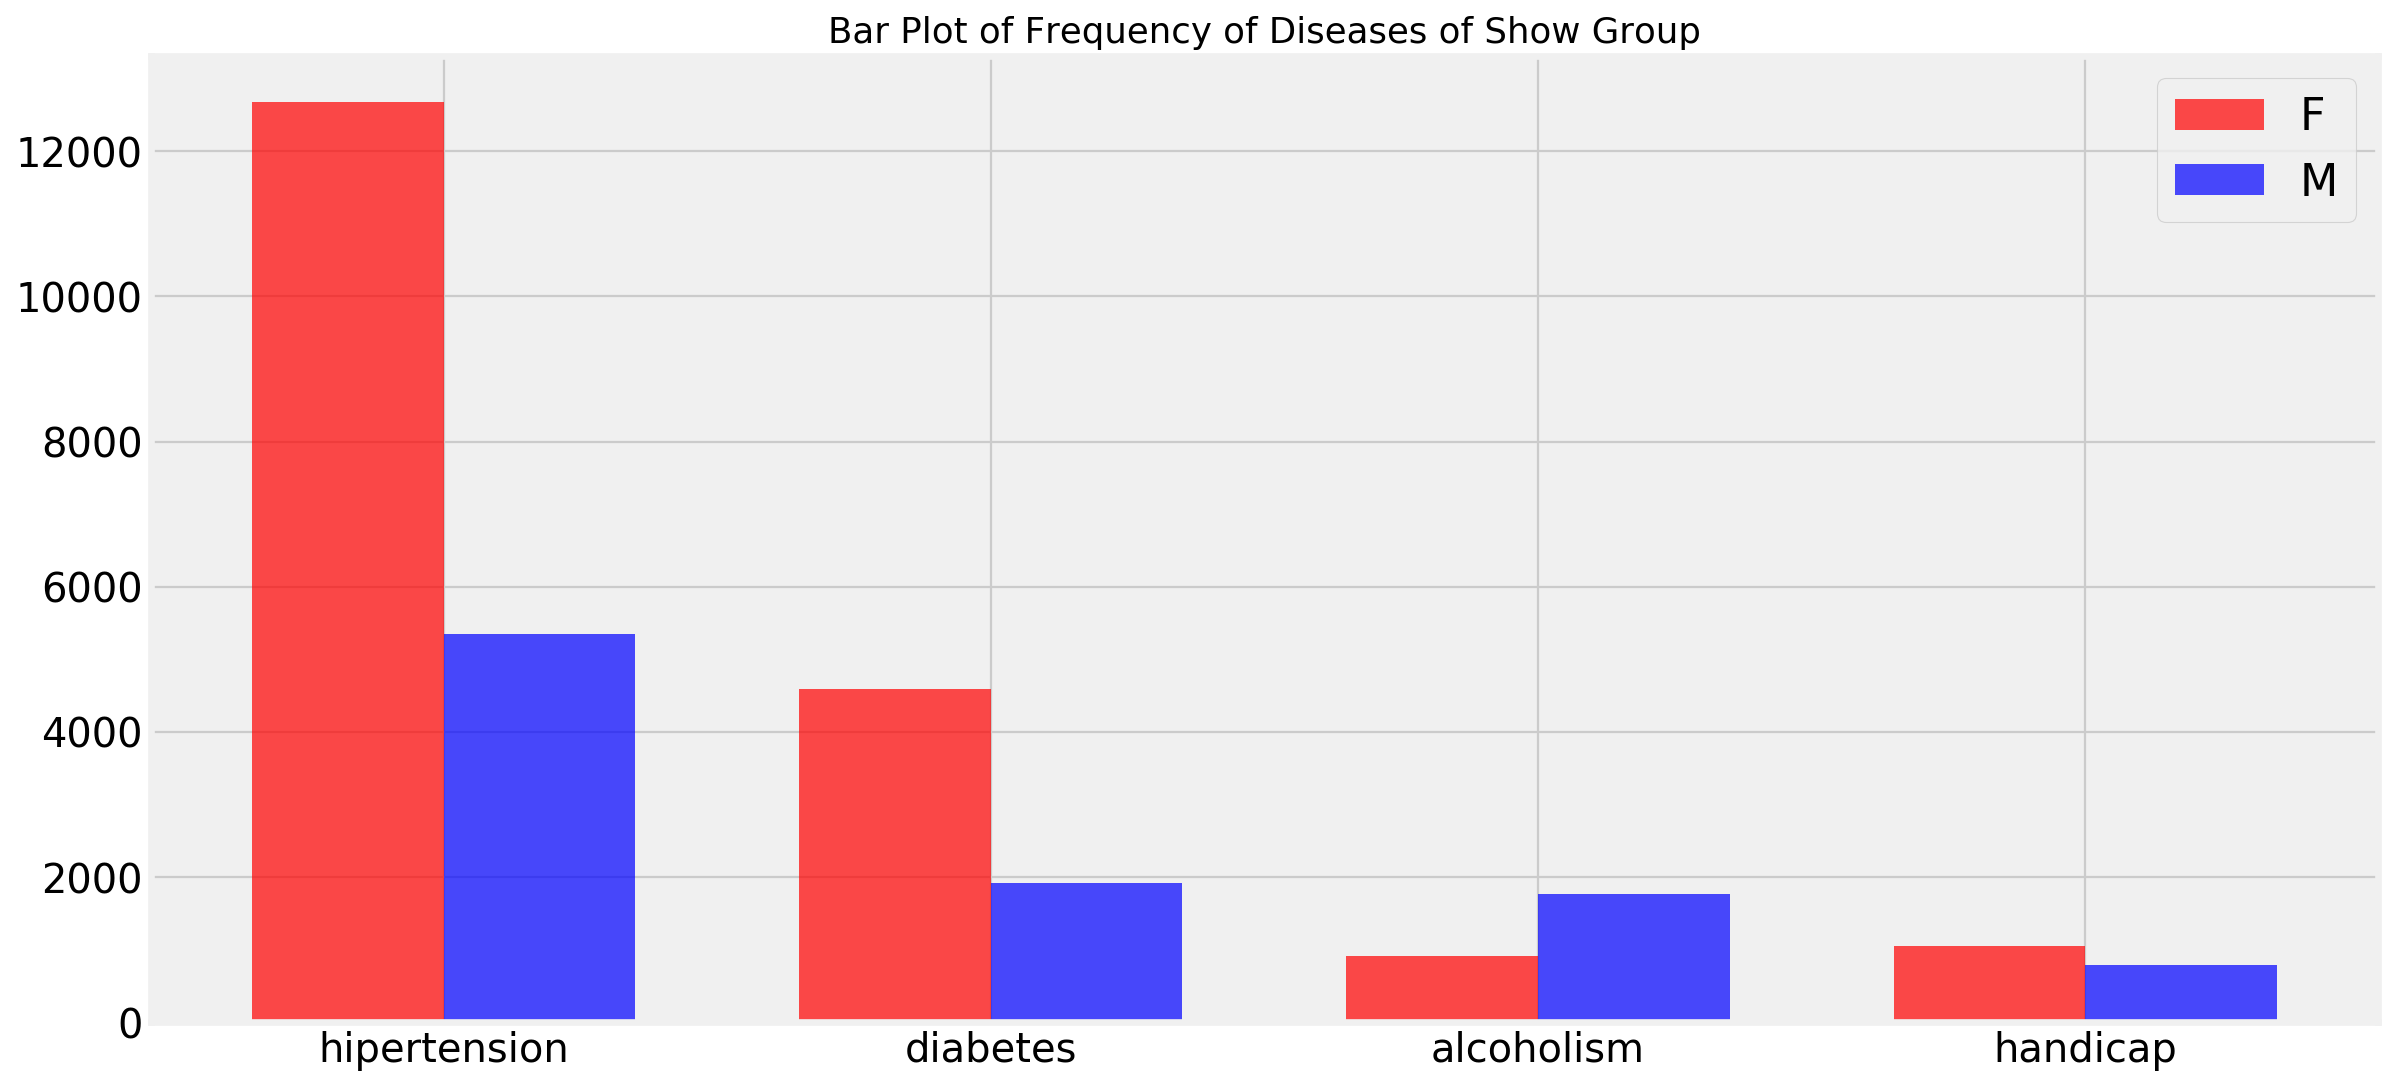

In [51]:
fig = plt.figure(figsize=(16,8),dpi=80)
ax = fig.add_subplot(1, 1, 1)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.bar(ind,show_groupby_gender.iloc[0,:],width,color='r',alpha=.7,label="F")
plt.bar(ind+width,show_groupby_gender.iloc[1,:],width,color='b',alpha=.7,label="M")
locations=ind+width/2
labels=show_groupby_gender.columns
plt.xticks(locations,labels)
plt.title("Bar Plot of Frequency of Diseases of Show Group",fontsize=16)
plt.legend(prop={'size': 20});

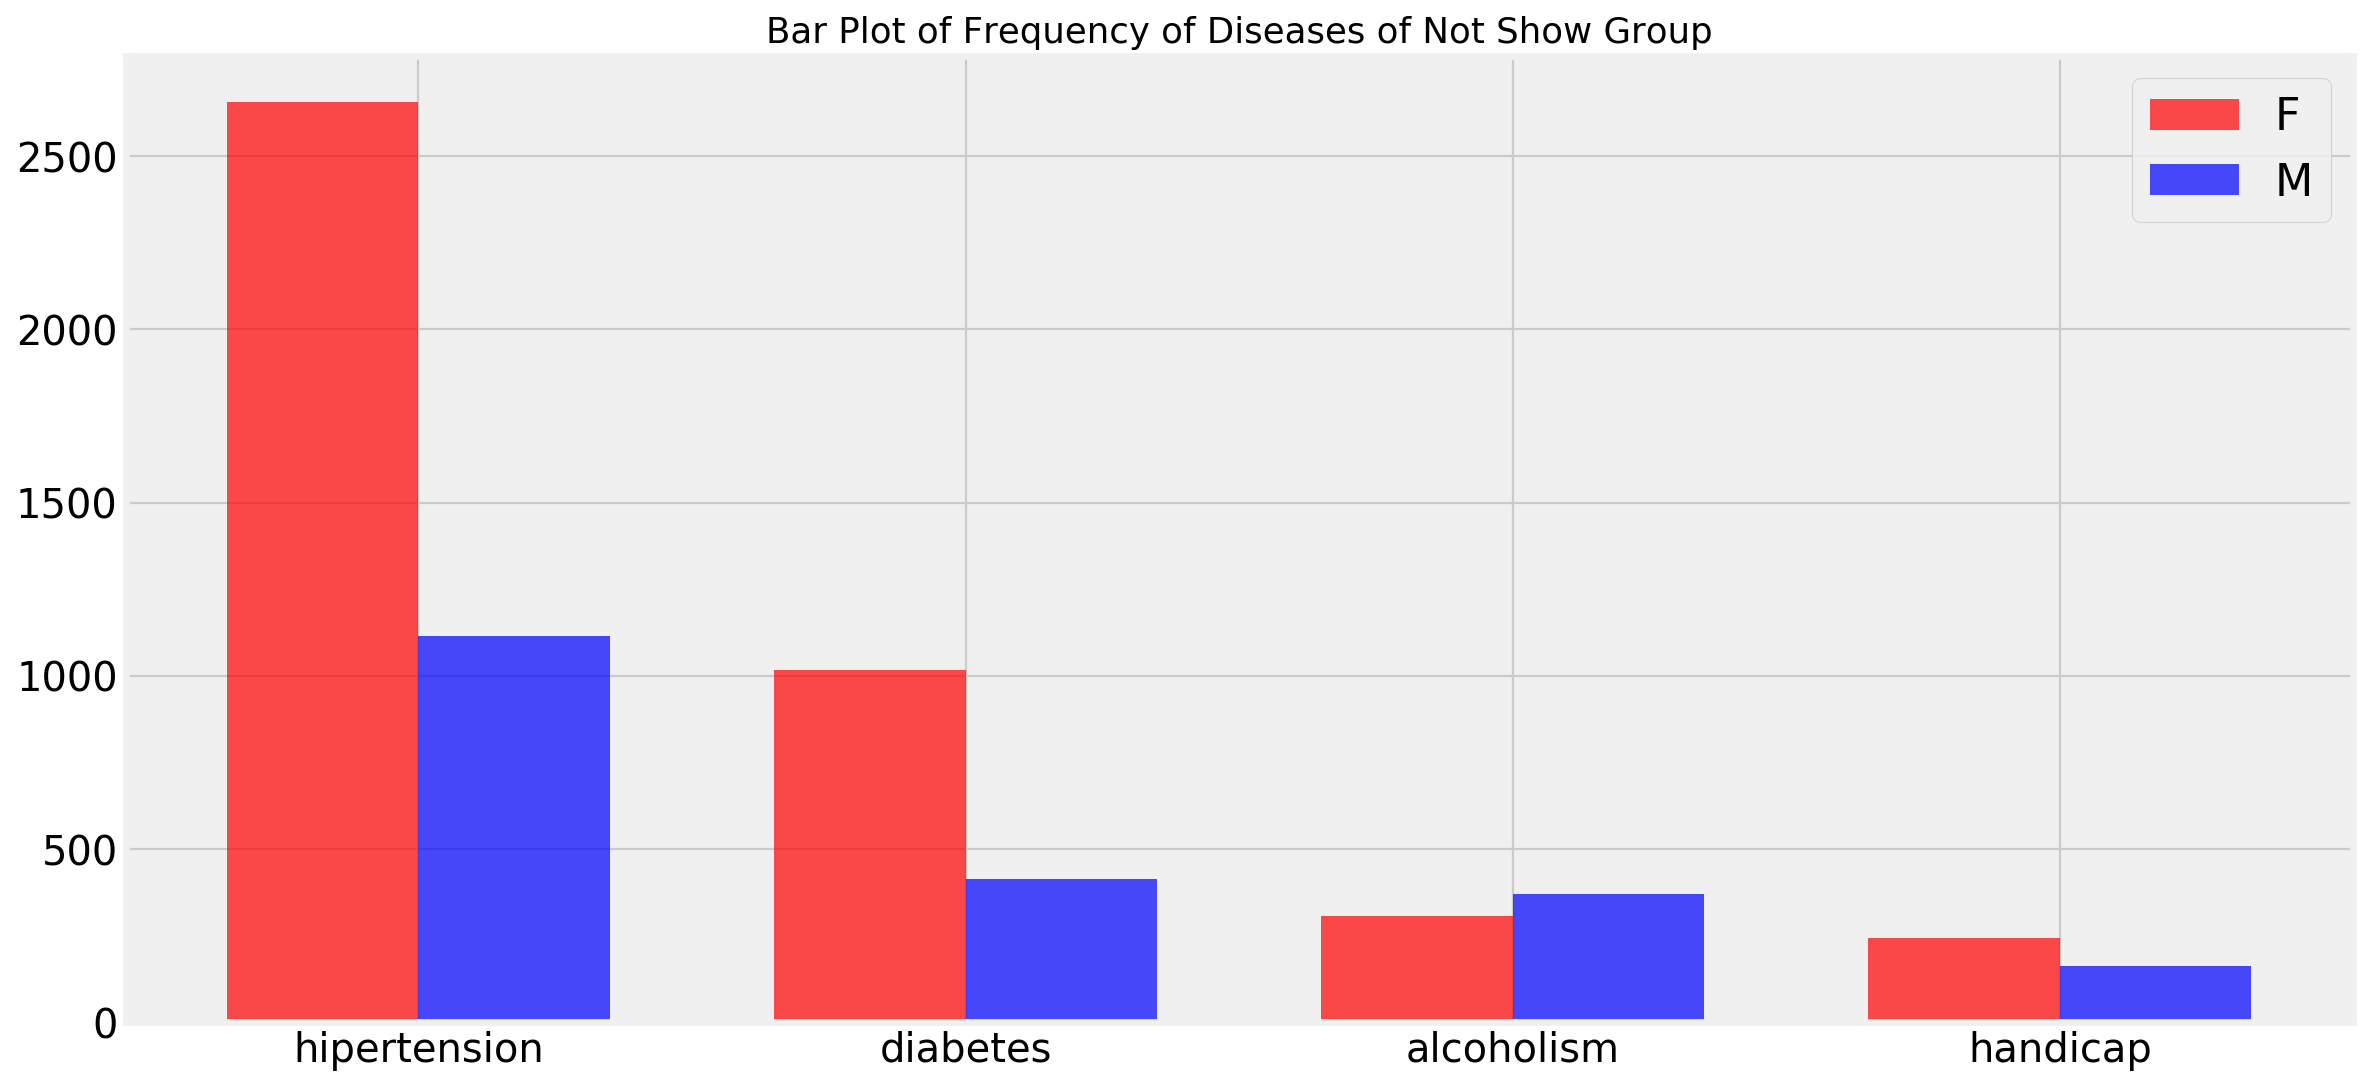

In [52]:
fig = plt.figure(figsize=(16,8),dpi=80)
ax = fig.add_subplot(1, 1, 1)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.bar(ind,noshow_groupby_gender.iloc[0,:],width,color='r',alpha=.7,label="F")
plt.bar(ind+width,noshow_groupby_gender.iloc[1,:],width,color='b',alpha=.7,label="M")
locations=ind+width/2
labels=noshow_groupby_gender.columns
plt.xticks(locations,labels)
plt.title("Bar Plot of Frequency of Diseases of Not Show Group",fontsize=16)
plt.legend(prop={'size': 20});

Both bar plots above shows that Female suffers a majority of the diseases, namely hipertension, diabetes, and handicap. Alcoholism is the only disease where men suffer more. However, because both plots share similar trends, no conclusion can be made whether diseases suffered can be used to predict show/not show in a scheduled appointment.

### Question 5: How do diseases age relate to diseases suffered?

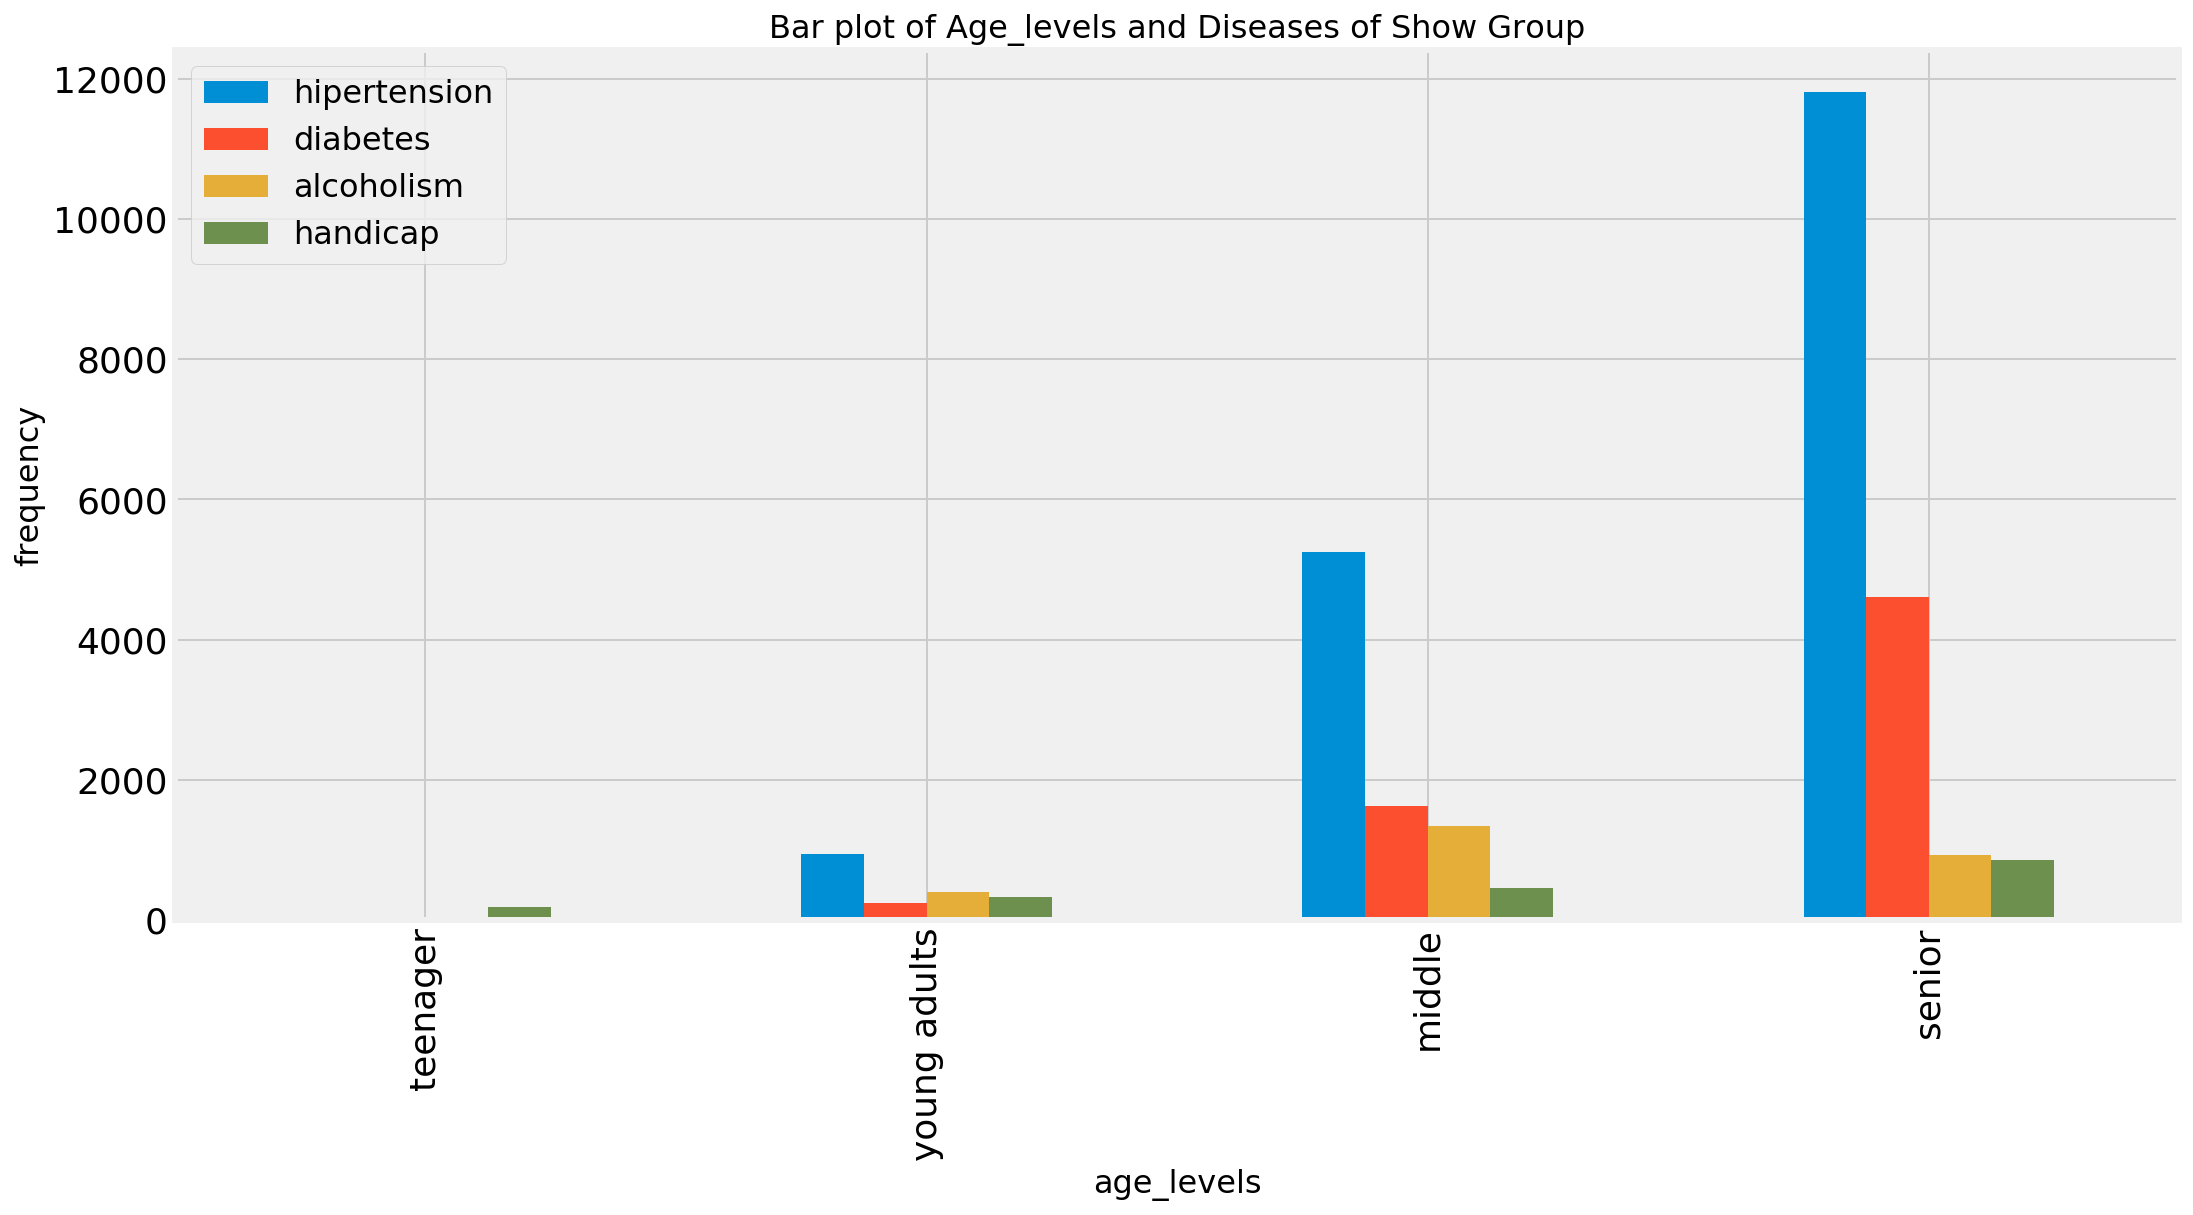

In [53]:
show.groupby("age_levels").sum().loc[:,"hipertension":"handicap"].plot(kind="bar",figsize=(16,8))
plt.title("Bar plot of Age_levels and Diseases of Show Group",fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylabel("frequency",fontsize=16)
plt.xlabel("age_levels",fontsize=16)
plt.legend(prop={'size': 16});

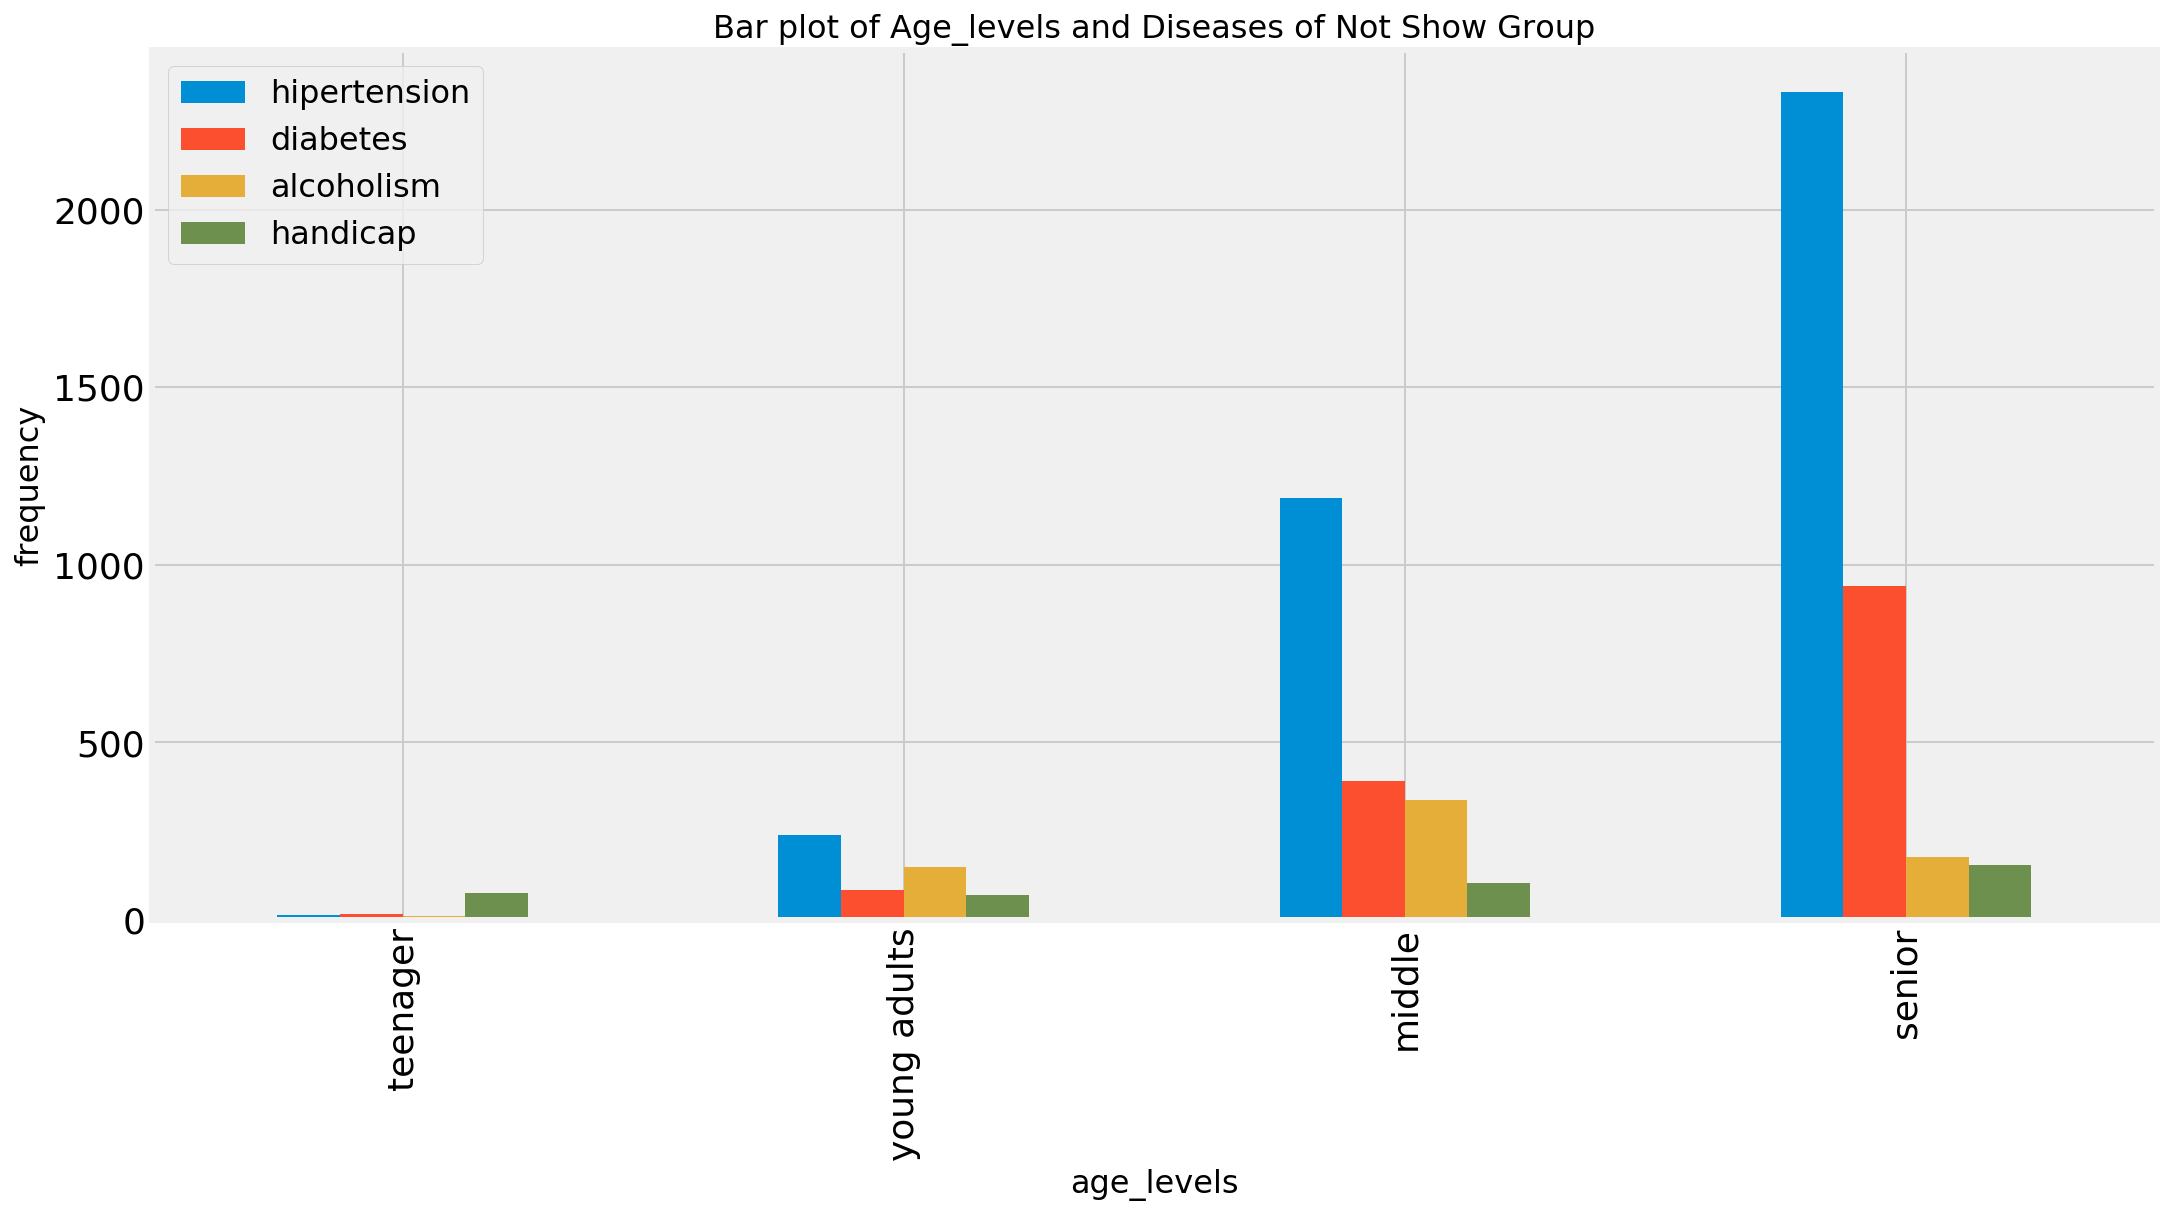

In [54]:
noshow.groupby("age_levels").sum().loc[:,"hipertension":"handicap"].plot(kind="bar",figsize=(16,8))
plt.title("Bar plot of Age_levels and Diseases of Not Show Group",fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylabel("frequency",fontsize=16)
plt.xlabel("age_levels",fontsize=16)
plt.legend(prop={'size': 16});

From the two bar plots above, we can conclude that the "senior" age group was the age group that suffer the most diseases. An increasing trend is observed for hipertension, diabetes and handicap, meanwhile, alcoholism was mostly suffered by people in the "middle" ages.

### Question 6: How total number of diseases suffered by each patient relate to Show or Not Show?

In [55]:
show.total.value_counts()[2:5]

2    6290
3     523
4       9
Name: total, dtype: int64

In [56]:
noshow.total.value_counts()[2:5]

2    1368
3      95
4       4
Name: total, dtype: int64

In [57]:
noshow_total_prop = noshow.total.value_counts()[2:5]/(show.total.value_counts()[2:5]+noshow.total.value_counts()[2:5])
noshow_total_prop

2    0.178637
3    0.153722
4    0.307692
Name: total, dtype: float64

The above statistics shows that patients with more than 1 disease are more likely to attend a scheduled appointment.

### Question 7: How location relate to Show or Not Show?

In [58]:
noshow_location_prop=noshow.neighbourhood.value_counts()/(show.neighbourhood.value_counts()+noshow.neighbourhood.value_counts())

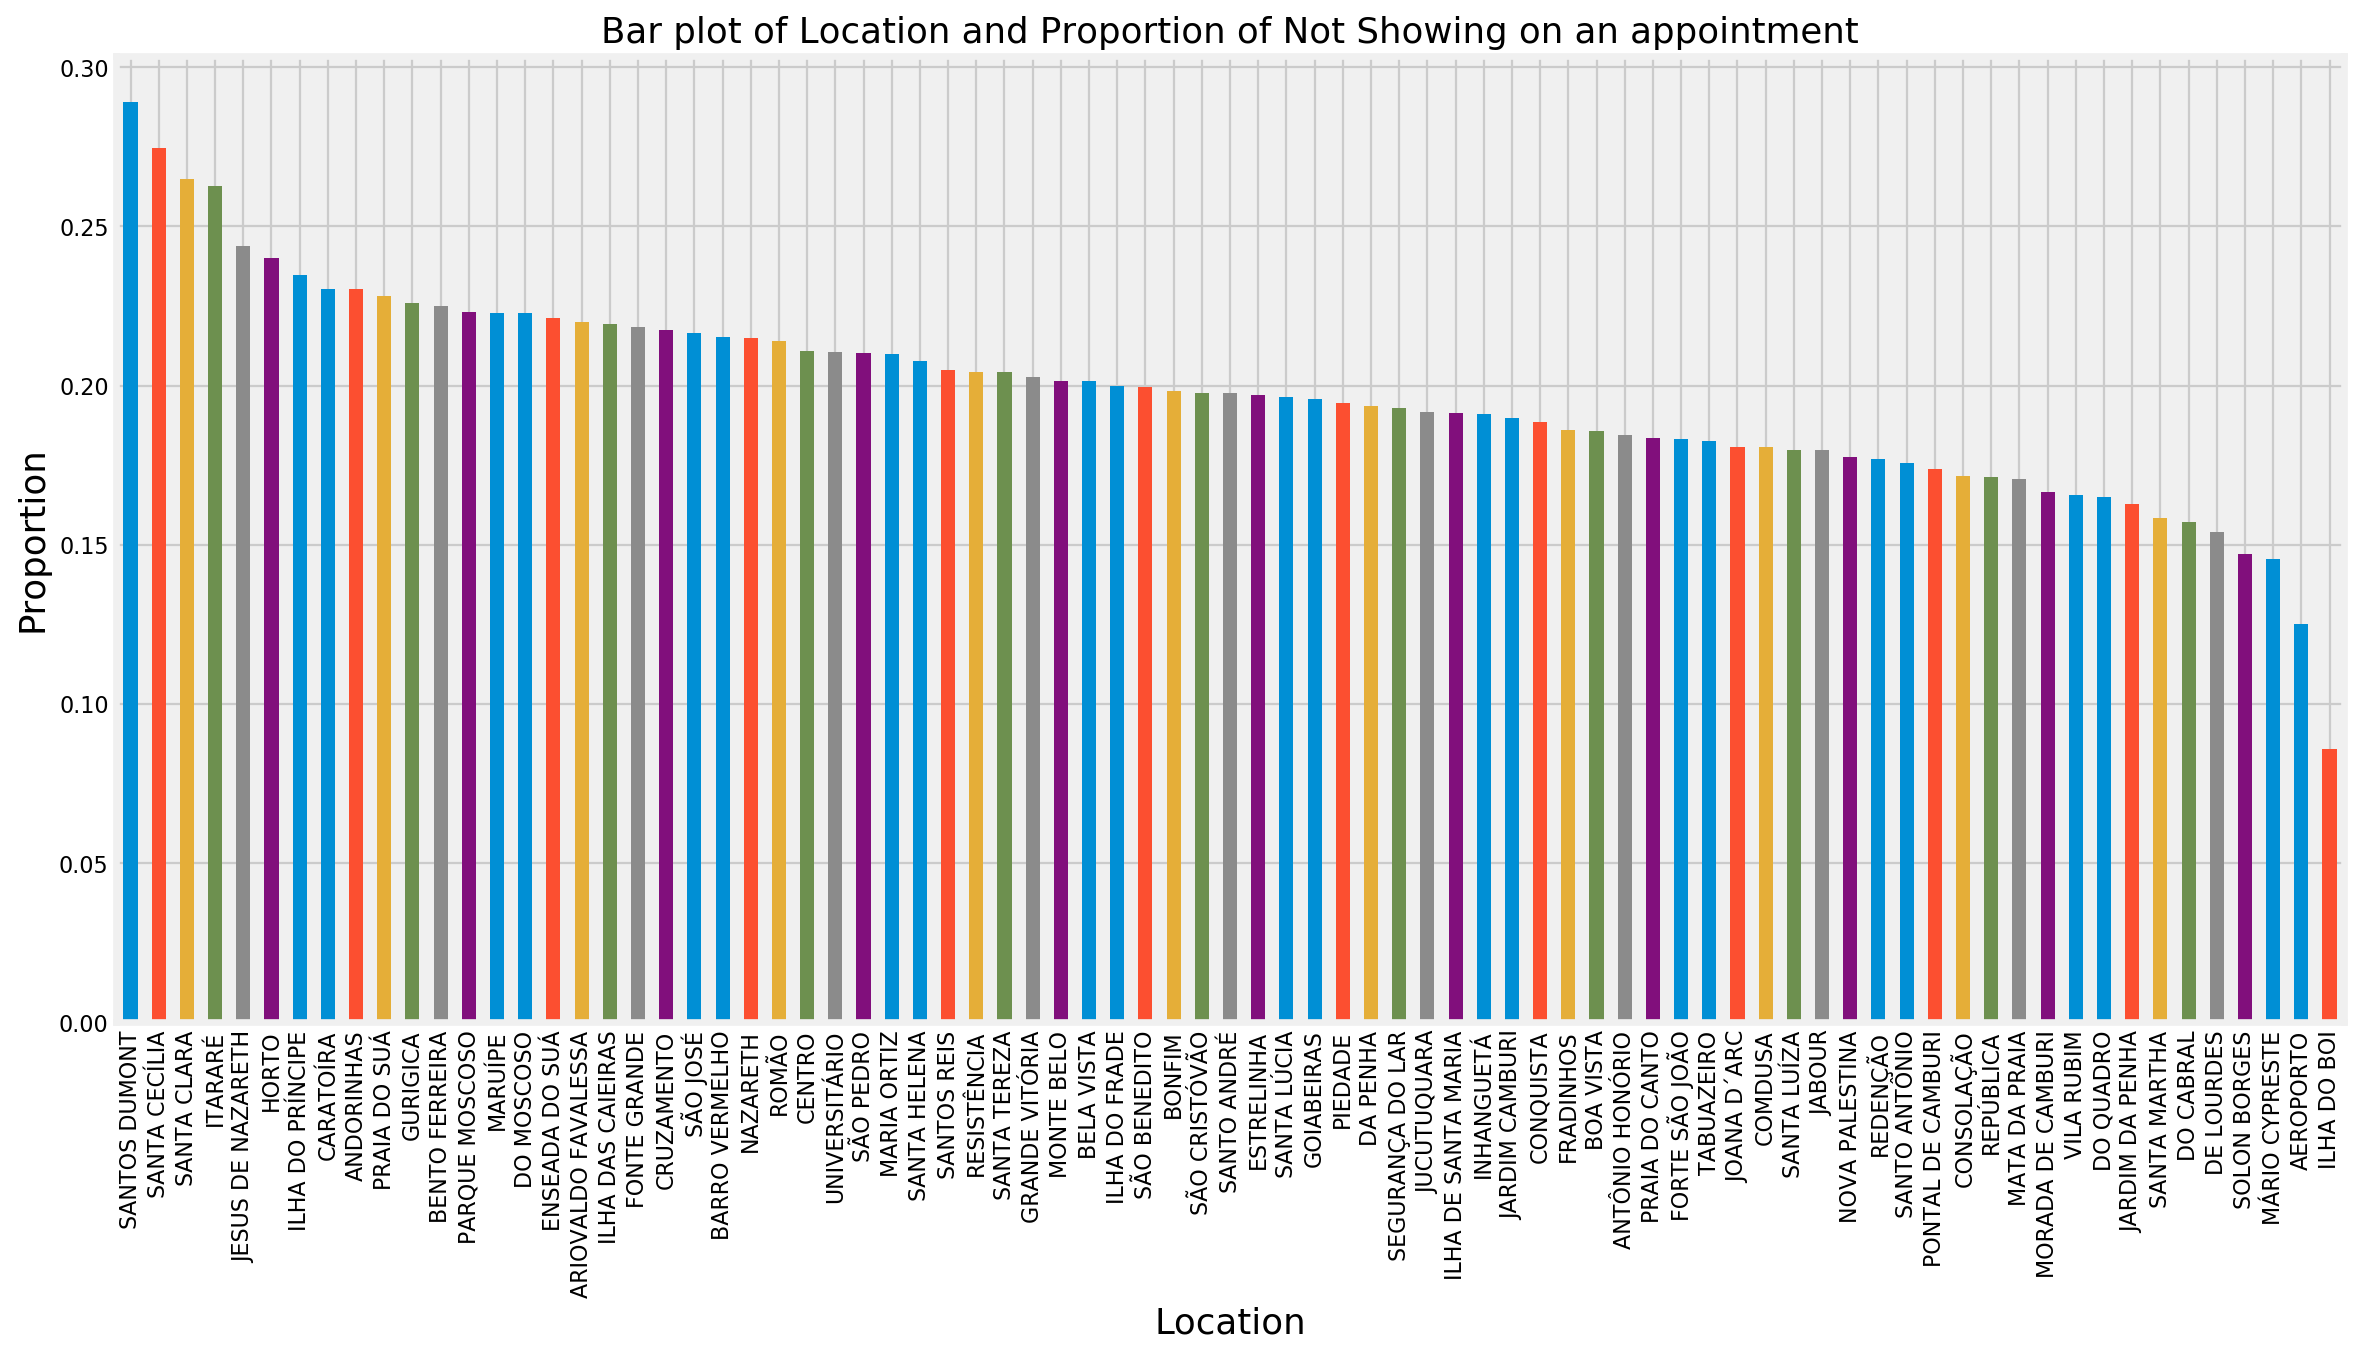

In [59]:
fig = plt.figure(figsize=(16,8),dpi=80)
ax = fig.add_subplot(1, 1, 1)
plt.title("Bar plot of Location and Proportion of Not Showing on an appointment",fontsize=16)
plt.ylabel("Proportion",fontsize=16)
plt.xlabel("Location",fontsize=16)
noshow_location_prop.sort_values(ascending=False).dropna().plot(kind="bar");

From the bar plot above, one can say that location was strongly related to show or not show in scheduled appointments. A further study on patients locations like Santos Dumont, Santa Cecilia, and Santa Clara would be better in providing insights, since they have the highest No Show medical appointments

### Question 8: How do waiting period relate to Show or Not Show?

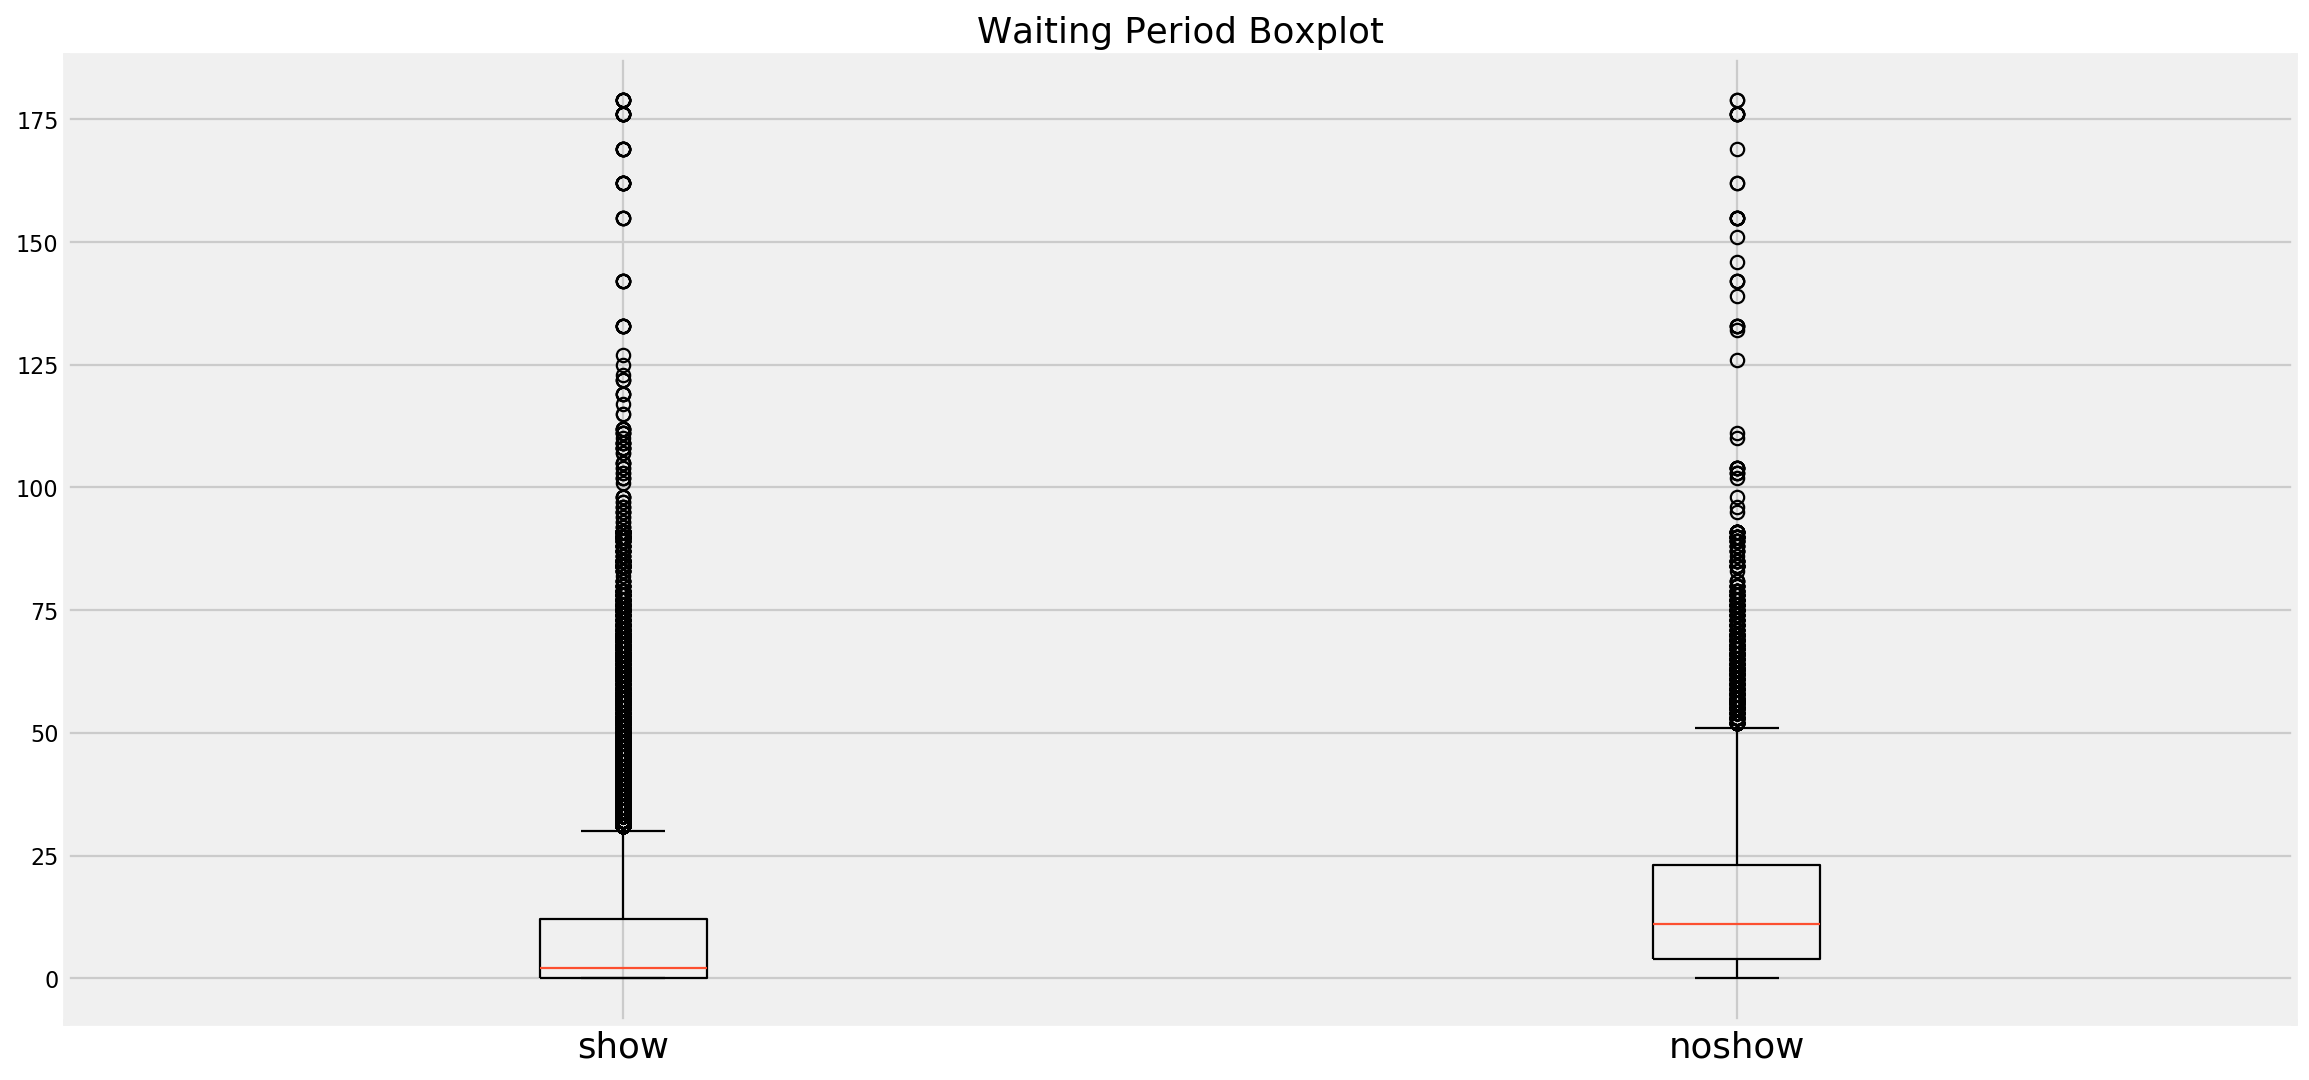

In [60]:
data=[show.await,noshow.await]
fig = plt.figure(figsize=(16,8),dpi=80)
plt.boxplot(data)
labels=["show","noshow"]
plt.title("Waiting Period Boxplot",fontsize=16)
plt.xticks([1,2],labels,fontsize=16);

The above boxplot shows that the No Show Group tend to have longer period between the scheduled day and appointment day compared to the Show Group as can be seen from the mean and median. Given this, waiting period can be used to predict whether a patient will show or not show on a medical appointment.

### Limitations

- The data contains some errors such as erroneous age data, and negative values of waiting period
- The data only presents the observations for 4 types of diseases, prevalent diseases such as heart diseases, cancer, or injuries were not taken into account
- It is possible that the data do not fully describes the population, since in most cases, although men suffer a disease, they seldom talk about their health and tend to choose not to go to a hospital for treatment compared to women given they suffer a disease.
- The not show group was tagged to suffer a disease, however they may not suffer the diseases tagged to them, which possibly causes them not to show in the appointments.

<a id='conclusions'></a>
## Conclusions


- Age, scholarship, location, complications, and waiting period can be used to predict show/nor show behaviour of patients in Mexico
- A more sophicticated method such as machine learning can be applied to determine important variables such as by feature importance
- In the sample, women are more prevalent than men in making medical appointments, this shows that men are healthier, or another possibility is that men don't car much to their own health
- the data shows that people are more vulnerable to diseases as they get older 